#### Aquí encontrarás todo lo que necesitas saber: https://www.kaggle.com/t/ab8726f0cfc84544abbae69a6be88071

## Librerias

In [2]:
from sklearn.datasets import load_iris, fetch_california_housing
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


import urllib.request
from PIL import Image

## Data

In [3]:
### Para que funcione necesitas bajarte los archivos de datos de Kaggle 
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")



## Data exploration

In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         391 non-null    int64  
 1   Company           391 non-null    object 
 2   Product           391 non-null    object 
 3   TypeName          391 non-null    object 
 4   Inches            391 non-null    float64
 5   ScreenResolution  391 non-null    object 
 6   Cpu               391 non-null    object 
 7   Ram               391 non-null    object 
 8   Memory            391 non-null    object 
 9   Gpu               391 non-null    object 
 10  OpSys             391 non-null    object 
 11  Weight            391 non-null    object 
dtypes: float64(1), int64(1), object(10)
memory usage: 36.8+ KB


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         912 non-null    int64  
 1   Company           912 non-null    object 
 2   Product           912 non-null    object 
 3   TypeName          912 non-null    object 
 4   Inches            912 non-null    float64
 5   ScreenResolution  912 non-null    object 
 6   Cpu               912 non-null    object 
 7   Ram               912 non-null    object 
 8   Memory            912 non-null    object 
 9   Gpu               912 non-null    object 
 10  OpSys             912 non-null    object 
 11  Weight            912 non-null    object 
 12  Price_euros       912 non-null    float64
dtypes: float64(2), int64(1), object(10)
memory usage: 92.8+ KB


In [6]:
train.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1104,Acer,Aspire ES1-523,Notebook,15.6,1366x768,AMD A8-Series 7410 2.2GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.4kg,387.0
1,114,Dell,XPS 13,Ultrabook,13.3,Quad HD+ / Touchscreen 3200x1800,Intel Core i7 7560U 2.4GHz,8GB,256GB SSD,Intel Iris Plus Graphics 640,Windows 10,1.23kg,1379.0
2,172,Acer,Aspire A517-51G,Notebook,17.3,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Nvidia GeForce MX150,Windows 10,3kg,854.0
3,918,HP,Elitebook 820,Netbook,12.5,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,512GB SSD,Intel HD Graphics 620,Windows 10,1.26kg,1483.0
4,447,Lenovo,IdeaPad 320-15AST,Notebook,17.3,1600x900,AMD A6-Series 9220 2.5GHz,8GB,1TB HDD,AMD Radeon R4,Windows 10,2.8kg,519.0


In [77]:
print(train['Company'].unique())

print(train['TypeName'].unique())  #convertir

print(train['ScreenResolution'].unique())

print(train['Ram'].unique())

print(train['Memory'].unique())

print(train['OpSys'].unique())    #convertir

print(train['Company'].unique())







['Acer' 'Dell' 'HP' 'Lenovo' 'Asus' 'Xiaomi' 'Apple' 'Samsung' 'Razer'
 'Toshiba' 'Fujitsu' 'Microsoft' 'MSI' 'LG' 'Mediacom' 'Google' 'Vero'
 'Huawei' 'Chuwi']
['Notebook' 'Ultrabook' 'Netbook' 'Gaming' '2 in 1 Convertible'
 'Workstation']
['1366x768' 'Quad HD+ / Touchscreen 3200x1800'
 'IPS Panel Full HD 1920x1080' 'Full HD 1920x1080' '1600x900'
 'IPS Panel Full HD / Touchscreen 1920x1080'
 'IPS Panel Retina Display 2304x1440'
 '4K Ultra HD / Touchscreen 3840x2160' 'Touchscreen 2560x1440'
 'Full HD / Touchscreen 1920x1080' '1440x900'
 'IPS Panel Quad HD+ / Touchscreen 3200x1800' 'Touchscreen 2256x1504'
 'IPS Panel 4K Ultra HD / Touchscreen 3840x2160'
 'IPS Panel Touchscreen / 4K Ultra HD 3840x2160' 'IPS Panel 1366x768'
 '4K Ultra HD 3840x2160' 'IPS Panel 4K Ultra HD 3840x2160'
 'IPS Panel Retina Display 2880x1800' 'IPS Panel Touchscreen 2560x1440'
 'Touchscreen 1366x768' '2560x1440' 'IPS Panel Retina Display 2560x1600'
 'Quad HD+ 3200x1800' 'IPS Panel Full HD 2560x1440' '1920x1080'
 

In [8]:
# train[['Memory','MemoryType']] = train['Memory'].str.split(' ', expand= True)
# no funciona porque hay valores con más de 2 'palabras'

In [9]:
train.rename(columns={'Weight': 'WeightInKgs'}, inplace=True)

In [10]:
train['WeightInKgs'] = train['WeightInKgs'].str.rstrip('kg')

In [11]:
train['Ram'] = train['Ram'].str.rstrip('GB')

In [12]:
train['Ram'] = train['Ram'].astype(int)

In [13]:
train['WeightInKgs'] = train['WeightInKgs'].astype(float)

In [14]:
train.dtypes

laptop_ID             int64
Company              object
Product              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                   int32
Memory               object
Gpu                  object
OpSys                object
WeightInKgs         float64
Price_euros         float64
dtype: object

## Data processing

In [15]:
train

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,WeightInKgs,Price_euros
0,1104,Acer,Aspire ES1-523,Notebook,15.6,1366x768,AMD A8-Series 7410 2.2GHz,4,500GB HDD,AMD Radeon R5,Windows 10,2.40,387.00
1,114,Dell,XPS 13,Ultrabook,13.3,Quad HD+ / Touchscreen 3200x1800,Intel Core i7 7560U 2.4GHz,8,256GB SSD,Intel Iris Plus Graphics 640,Windows 10,1.23,1379.00
2,172,Acer,Aspire A517-51G,Notebook,17.3,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Nvidia GeForce MX150,Windows 10,3.00,854.00
3,918,HP,Elitebook 820,Netbook,12.5,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,512GB SSD,Intel HD Graphics 620,Windows 10,1.26,1483.00
4,447,Lenovo,IdeaPad 320-15AST,Notebook,17.3,1600x900,AMD A6-Series 9220 2.5GHz,8,1TB HDD,AMD Radeon R4,Windows 10,2.80,519.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,996,Lenovo,IdeaPad 320-15ABR,Notebook,15.6,Full HD 1920x1080,AMD A12-Series 9720P 3.6GHz,6,256GB SSD,AMD Radeon 530,Windows 10,2.20,549.00
908,731,Dell,Alienware 17,Gaming,17.3,4K Ultra HD 3840x2160,Intel Core i7 7700HQ 2.8GHz,32,1TB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.36,3659.40
909,276,Asus,Rog Strix,Gaming,17.3,Full HD 1920x1080,AMD Ryzen 1700 3GHz,16,256GB SSD + 1TB HDD,AMD Radeon RX 580,Windows 10,3.20,1549.00
910,585,MSI,GT73VR Titan,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7820HK 2.9GHz,16,512GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.14,2729.00


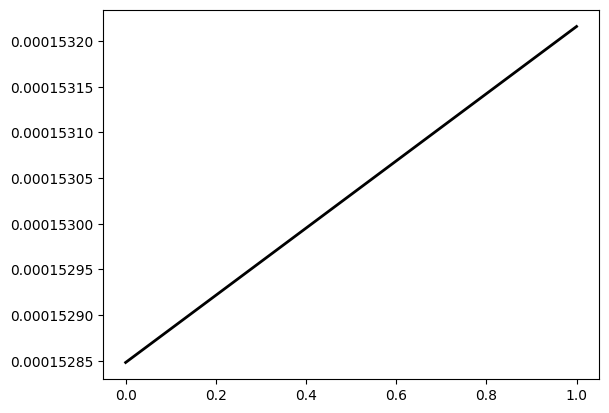

In [76]:
# Adding the normal distribution line
mu, std = train["Price_euros"].mean(), train["Price_euros"].std()
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

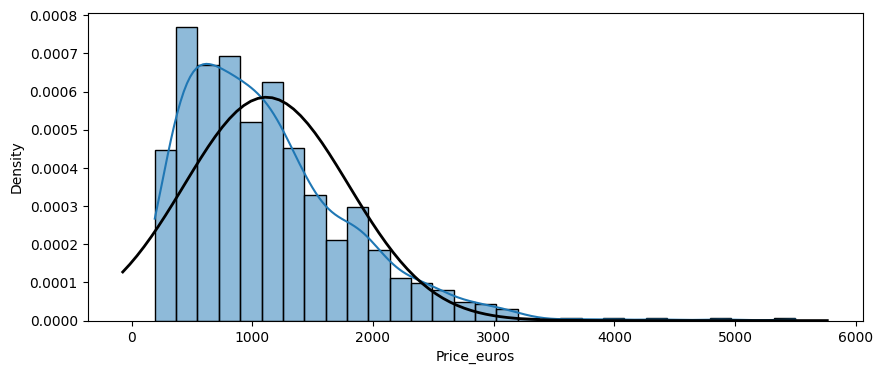

In [17]:
plt.figure(figsize=(10,4))
sns.histplot(train["Price_euros"], kde=True, stat="density")


mu, std = train["Price_euros"].mean(), train["Price_euros"].std()
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

Utilizariamos una transformación logaritmica en los datos de precio para normalizar la curva: 
***La transformación logarítmica se usa normalmente si los datos tienen una distribución sesgada de forma positiva (como se muestra a continuación) y algunos valores son muy grandes. Si estos valores grandes están en su área de estudio, la transformación logarítmica le ayudará a que las varianzas sean más constantes y normalizará sus datos. Con respecto a la terminología, cuando se implementa una transformación logarítmica con kriging, el método de predicción se conoce como kriging lognormal, mientras que para todos los demás valores de λ, el método de kriging asociado se conoce como kriging transgaussiano.***



<Axes: >

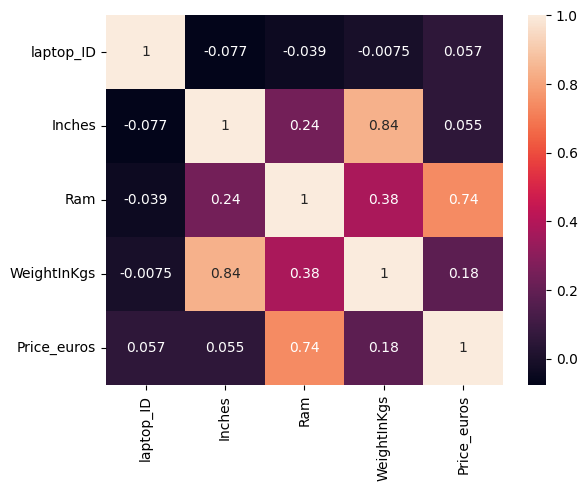

In [18]:
sns.heatmap(train.corr(numeric_only=True), annot=True)

In [19]:
df = train.groupby(['Company'])['Price_euros'].mean().reset_index().sort_values(by='Price_euros',ascending=False)

In [20]:
df

,Company,Price_euros
14,Razer,3399.000000
9,LG,1999.000000
11,MSI,1861.424571
6,Google,1677.666667
15,Samsung,1659.000000
13,Microsoft,1612.308333
8,Huawei,1499.000000
1,Apple,1455.632500
16,Toshiba,1208.718750
4,Dell,1180.813491


Text(0.5, 1.0, 'Promedio del precio por compañia')

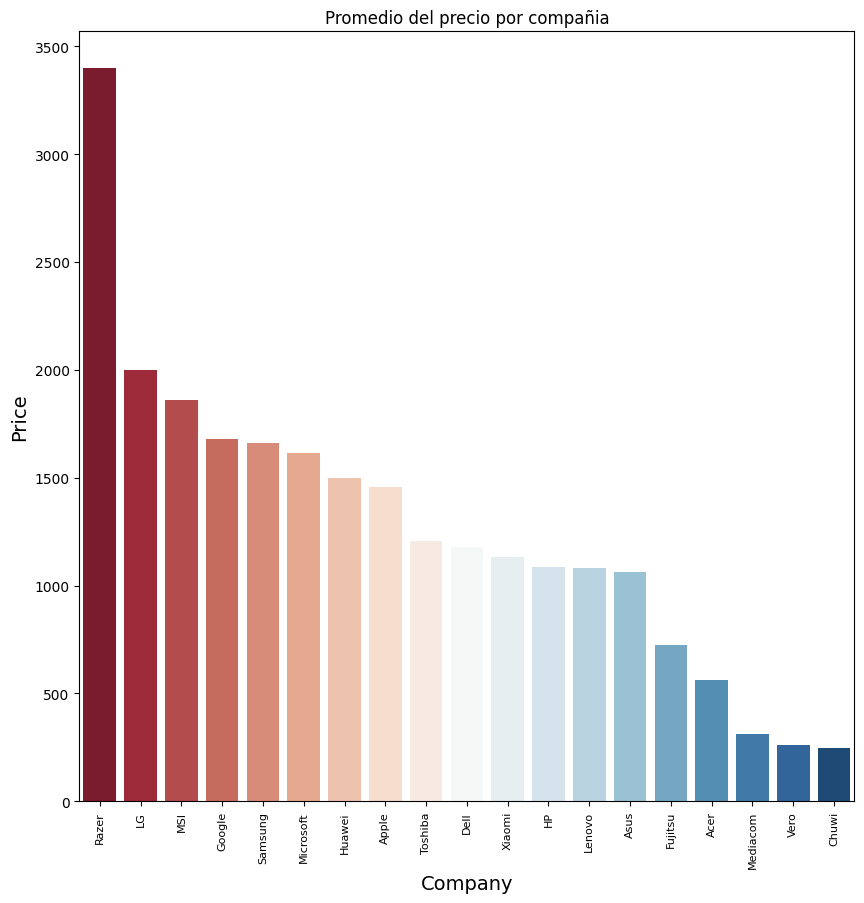

In [21]:
plt.figure(figsize = (10,10))
splot = sns.barplot(data = df, x = 'Company', y = 'Price_euros', hue='Company', palette = 'RdBu')
# for p in splot.patches:
#     splot.annotate(format(p.get_height(), '.1f'), 
#                    (p.get_x() + p.get_width() / 2., p.get_height()), 
#                    ha = 'center', va = 'center', 
#                    xytext = (0, 9), 
#                    textcoords = 'offset points')
plt.xticks(fontsize= 8,rotation='vertical')
plt.xlabel("Company", size=14)
plt.ylabel("Price", size=14)
plt.title('Promedio del precio por compañia')

-----------------------------------------------------------------------------------------------------------------

**Cardinalidad**

In [44]:
for i in train.select_dtypes(include=object):
        print(f'La cardinalidad de la variable {i} es {(train[i].nunique()/train.shape[0])*100:.2f}%')

La cardinalidad de la variable Company es 2.08%
La cardinalidad de la variable Product es 51.21%
La cardinalidad de la variable TypeName es 0.66%
La cardinalidad de la variable ScreenResolution es 3.73%
La cardinalidad de la variable Cpu es 10.53%
La cardinalidad de la variable Memory es 3.51%
La cardinalidad de la variable Gpu es 10.31%
La cardinalidad de la variable OpSys es 0.99%


## Pasos que si o si debéis realizar para poder participar en la competición:

In [22]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder,StandardScaler,MinMaxScaler,LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

### 1. Definir X e y

In [23]:
# train = train[['laptop_ID','Ram','Inches','Price_euros','WeightInKgs',]]

In [24]:
train.columns

Index(['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys',
       'WeightInKgs', 'Price_euros'],
      dtype='object')

In [25]:
X = train.drop(['Price_euros'], axis=1)
y = train['Price_euros'].copy()
X.shape

(912, 12)

In [26]:
y.shape

(912,)

In [28]:
train.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,WeightInKgs,Price_euros
0,1104,Acer,Aspire ES1-523,Notebook,15.6,1366x768,AMD A8-Series 7410 2.2GHz,4,500GB HDD,AMD Radeon R5,Windows 10,2.40,387.0
1,114,Dell,XPS 13,Ultrabook,13.3,Quad HD+ / Touchscreen 3200x1800,Intel Core i7 7560U 2.4GHz,8,256GB SSD,Intel Iris Plus Graphics 640,Windows 10,1.23,1379.0
2,172,Acer,Aspire A517-51G,Notebook,17.3,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Nvidia GeForce MX150,Windows 10,3.00,854.0
3,918,HP,Elitebook 820,Netbook,12.5,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,512GB SSD,Intel HD Graphics 620,Windows 10,1.26,1483.0
4,447,Lenovo,IdeaPad 320-15AST,Notebook,17.3,1600x900,AMD A6-Series 9220 2.5GHz,8,1TB HDD,AMD Radeon R4,Windows 10,2.80,519.0


In [66]:
numeric_features = ['laptop_ID', 'Inches', 'Ram']
categorical_features = ['Company', 'TypeName', 'OpSys']
# sacamos species de categorical porque es la TARGET

In [67]:
numeric_transformer = make_pipeline(StandardScaler())

categorical_transformer = make_pipeline(OneHotEncoder(handle_unknown='ignore'))

In [68]:
numeric_transformer


Pipeline(steps=[('standardscaler', StandardScaler())])

In [69]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num',numeric_transformer,numeric_features),
        ('cat',categorical_transformer,categorical_features)
        ]
)


### 2. Dividir X_train, X_test, y_train, y_test

### 3. Asignar el modelo (vacío) a una variable


In [70]:
from sklearn.linear_model import LinearRegression

model = make_pipeline(preprocessor, LinearRegression() )

In [71]:
model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['laptop_ID', 'Inches',
                                                   'Ram']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Company', 'TypeName',
                                                   'OpSys'])])),
                ('linearregression', LinearRegression())])

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42) 

In [73]:
model.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['laptop_ID', 'Inches',
                                                   'Ram']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Company', 'TypeName',
                                                   'OpSys'])])),
                ('linearregression', LinearRegression())])

In [74]:
pred = model.predict(X_test)
pred

array([ 900.24211727,  303.6905112 ,  852.67985384, 1431.72353816,
       2124.50355726,  492.46187376,  958.32550726, 1641.0388198 ,
        856.27831456, 1358.14648501, 1092.95324792,  604.52056762,
        532.43547778, 1467.25520362, 1335.26612608, 1741.28737647,
       1914.53526888, 1209.36287666,  888.15609645,  348.20498362,
        866.72178695,  710.60049191, 1065.55601585, 1196.13633562,
        765.02253886,  308.53704998,  867.09806772, 1730.25731209,
        709.38295537,  753.75900718, 1430.99597524, 1113.08179894,
        856.75401016, 1578.79118452, 1068.37539603,  394.87061415,
        725.17825326,  566.62266079, 1447.26546972, 1290.17467351,
       1195.72554273,  987.52398591, 1014.708588  , 1803.08755116,
       1051.04464036,  694.76167069, 1415.92161818,  691.78622237,
       1289.07933543,  975.51665711, 1700.44939124,  708.51862244,
        487.71031194, 2368.87933161, 1003.08442346, 1678.84713626,
       1756.77533017, 1112.02221728, 2055.79457152, 1787.51977

### 4. Sacar métricas, valorar el modelo 

Recuerda que en la competición se va a evaluar con la métrica de MAE.

In [75]:
from sklearn.metrics import mean_squared_error
import numpy as np

print('RMSE :',np.sqrt(mean_squared_error(y_test,pred)))

RMSE : 409.3353347683507


-----------------------------------------------------------------

## Una vez listo el modelo, toca predecir con el dataset de predicción 

Definición de **modelo que está listo**. 

Tras hacer suficientes pruebas, analizar los datos, hacer feature engineering, probar diferentes modelos con diferentes parámetros, es con este con el que observo mejores métricas y menos overfitting. ¡Cuidado con el overfitting aquí! Si vuestro modelo aprende muy bien de estos datos pero hay overfitting cuando le pasemos los datos desconocidos de `test.csv` nos arriesgamos a que digamos, no salga lo esperado.

### 1. Entrena dicho modelo con TODOS tus datos de train, esto es con `train.csv` al completo.


**CON LAS TRANSFORMACIONES QUE LE HAYAS REALIZADO A `X` INCLUÍDAS.**


Véase:
- Estandarización/Normalización
- Eliminación de Outliers
- Eliminación de columnas
- Creación de columnas nuevas
- Gestión de valores nulos
- Y un largo etcétera de técnicas que como Data Scientist hayas considerado las mejores para tu dataset.

### 2. Carga los datos de `test.csv` para predecir.

In [39]:
X_pred = pd.read_csv("data/test.csv")
X_pred.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
0,750,Toshiba,Tecra X40-D-10G,Notebook,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.25kg
1,726,Mediacom,Smartbook 142,Notebook,14.0,IPS Panel Full HD 1920x1200,Intel Atom Z8350 1.92GHz,4GB,32GB HDD,Intel HD Graphics 400,Windows 10,1.4kg
2,633,Mediacom,SmartBook 140,Notebook,14.0,Full HD 1920x1080,Intel Atom x5-Z8350 1.44GHz,2GB,32GB Flash Storage,Intel HD Graphics,Windows 10,1.4kg
3,363,Dell,Inspiron 7577,Gaming,15.6,Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8GB,1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.65kg
4,319,Asus,VivoBook Flip,2 in 1 Convertible,11.6,Touchscreen 1366x768,Intel Celeron Dual Core N3350 1.1GHz,2GB,32GB Flash Storage,Intel HD Graphics 500,Windows 10,1.1kg


In [40]:
X_pred=X_pred[['laptop_ID','Inches']]

In [41]:
X_pred

,laptop_ID,Inches
0,750,14.0
1,726,14.0
2,633,14.0
3,363,15.6
4,319,11.6
...,...,...
386,693,15.6
387,1132,12.5
388,49,15.6
389,1243,15.6


**¿Por qué da error?** 

In [42]:
predictions_submit = model.predict(X_pred)
predictions_submit

KeyError: "['Ram', 'WeightInKgs'] not in index"

IMPORTANTE: APLICAR LO MISMO A ESTOS DATOS QUE HAYÁIS APLICADO A LOS DATOS DE ENTRENAMIENTO

- SI EL ARRAY CON EL QUE HICISTEIS `.fit()` ERA DE 4 COLUMNAS, PARA `.predict()` DEBEN SER LAS MISMAS
- SI AL ARRAY CON EL QUE HICISTEIS `.fit()` LO NORMALIZASTEIS, PARA `.predict()` DEBÉIS NORMALIZARLO
- TODO IGUAL SALVO BORRAR FILAS, EL NÚMERO DE ROWS SE DEBE MANTENER EN ESTE SET, PUES LA PREDICCIÓN DEBE TENER 391 FILAS, SI O SI

**Entonces, si al cargar los datos de train usé `index_col=0` para que utilizara la primera columna del conjunto de datos como índice, ¿tendré que hacerlo también para el conjunto `test.csv`?**

In [ ]:
# ¿Qué opináis?
# Sí

![](https://www.tierraljelechu.com/web/img/wiki_up/1.996-SorpresaDto.-1-Red.jpg)

### 3. AHORA puedo hacer la predicción que será lo que subirás a Kaggle. 

**¿Qué es lo que subirás a Kaggle?**

In [ ]:
predictions_submit = model.predict(X_pred)
predictions_submit

array([1097.6423004 , 1095.00755928, 1084.79793741, 1101.01825451,
        981.53500887, 1062.70472731, 1123.17875843, 1136.91660235,
       1100.68891187, 1171.05845611, 1061.49713762, 1039.67799563,
       1120.5592512 , 1084.55112248, 1067.42530516, 1144.60126397,
       1008.086748  , 1087.21311678, 1117.59516743, 1166.6672209 ,
       1136.28517025, 1137.01114934, 1201.1384173 , 1195.5395924 ,
       1155.57935199, 1095.22712104, 1205.96877603, 1141.07304191,
       1087.734768  , 1145.58929189, 1069.84048452, 1117.48538655,
       1169.08240026, 1183.02457206, 1166.99656354, 1048.59589281,
       1143.28389341, 1069.57766753, 1078.759989  , 1072.74768646,
       1196.62216731, 1063.58297435, 1030.59182845,  995.79128941,
       1065.55903019, 1129.78084514, 1071.26763597, 1167.64001493,
       1224.39673002, 1248.32896191, 1181.26807797, 1092.56512673,
       1090.69885177, 1189.17230135, 1066.32749635, 1158.8727784 ,
       1102.11606331, 1053.33170455, 1106.66997846, 1072.30856

**¡PERO! Para subir a Kaggle la predicción, ésta tendrá que tener una forma específica y no valdrá otra.**

En este caso, la **MISMA** forma que `sample_submission.csv`. 

In [ ]:
sample = pd.read_csv("data/sample_submission.csv")

In [ ]:
sample.head()

,laptop_ID,Price_euros
0,750,500
1,726,500
2,633,500
3,363,650
4,319,650


In [ ]:
sample.shape

(391, 2)

### 4. Mete tus predicciones en un dataframe. 

En este caso, la **MISMA** forma que `sample_submission.csv`. 

In [ ]:
submission = pd.DataFrame({"laptop_ID": sample['laptop_ID'], "Price_euros": predictions_submit})

In [ ]:
submission.head()

,laptop_ID,Price_euros
0,750,1097.642300
1,726,1095.007559
2,633,1084.797937
3,363,1101.018255
4,319,981.535009


In [ ]:
submission.shape

(391, 2)

### 5. Pásale el CHEQUEATOR para comprobar que efectivamente está listo para subir a Kaggle.

In [ ]:
def chequeator(df_to_submit):
    """
    Esta función se asegura de que tu submission tenga la forma requerida por Kaggle.
    
    Si es así, se guardará el dataframe en un `csv` y estará listo para subir a Kaggle.
    
    Si no, LEE EL MENSAJE Y HAZLE CASO.
    
    Si aún no:
    - apaga tu ordenador, 
    - date una vuelta, 
    - enciendelo otra vez, 
    - abre este notebook y 
    - leelo todo de nuevo. 
    Todos nos merecemos una segunda oportunidad. También tú.
    """
    if df_to_submit.shape == sample.shape:
        if df_to_submit.columns.all() == sample.columns.all():
            if df_to_submit.laptop_ID.all() == sample.laptop_ID.all():
                print("You're ready to submit!")
                submission.to_csv("submission.csv", index = False) #muy importante el index = False
                urllib.request.urlretrieve("https://i.kym-cdn.com/photos/images/facebook/000/747/556/27a.jpg", "gfg.png")     
                img = Image.open("gfg.png")
                img.show()   
            else:
                print("Check the ids and try again")
        else:
            print("Check the names of the columns and try again")
    else:
        print("Check the number of rows and/or columns and try again")
        print("\nMensaje secreto de Clara: No me puedo creer que después de todo este notebook hayas hecho algún cambio en las filas de `diamonds_test.csv`. Lloro.")


In [ ]:
chequeator(submission)

You're ready to submit!
